# Website 
https://github.com/elizasomerville/pycsodata


## Loading a dataset
A CSO dataset with a known table code (see how to search all datasets using CSOCatalogue below) can be loaded as follows:

In [5]:
from pycsodata import CSODataset

# Load the CSO dataset with code "FY051A"
ds = CSODataset("FY051A")

# Print its metadata
ds.describe()

Code:                FY051A
Title:               Average Age of Population

Variables:           [1] Statistic
                        (1) Average Age of Population
                            Unit: Number
                     [2] CensusYear
                     [3] Sex
                     [4] Admin Counties

Tags:                Official Statistics, Geographic Data
Time Variable:       CensusYear
Geographic Variable: Admin Counties

Last Updated:        2023-05-30
Reason for Release:  Planned release

Notes:             * The official boundaries of Cork City and Cork County have
                     changed since Census 2016. The ‘A’ version of a table (FYXXXA)
                     is based on the new Administrative Counties and contains figures
                     for Cork City and Cork County individually; therefore
                     comparisons across census years are not possible. In the ‘B’
                     version, Cork City and County have been amalgamated making
     

This may conveniently be loaded into a pandas DataFrame by calling .df():

In [6]:
# Load the data into a DataFrame
df = ds.df()
print(df.head())

                   Statistic CensusYear         Sex Admin Counties  value
0  Average Age of Population       2022  Both sexes        Ireland   38.8
1  Average Age of Population       2022  Both sexes         Carlow   38.8
2  Average Age of Population       2022  Both sexes          Cavan   38.5
3  Average Age of Population       2022  Both sexes          Clare   40.1
4  Average Age of Population       2022  Both sexes      Cork City   39.1


The data can also be conveniently filtered on any of its dimensions. This is done by passing filters, a dictionary mapping each dimension to a list containing a subset of values:

In [7]:
# Filter the data by year and sex
ds = CSODataset("FY051A", filters={"CensusYear":["2022"], "Sex":["Female"]})
df = ds.df()
print(df.head())

                   Statistic CensusYear     Sex Admin Counties  value
0  Average Age of Population       2022  Female        Ireland   39.4
1  Average Age of Population       2022  Female         Carlow   39.3
2  Average Age of Population       2022  Female          Cavan   38.9
3  Average Age of Population       2022  Female          Clare   40.5
4  Average Age of Population       2022  Female      Cork City   39.7


One may similarly create a geopandas GeoDataFrame by calling .gdf(), making it easy to plot the data on a map:

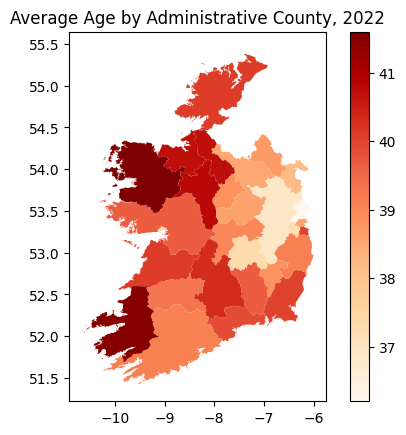

In [9]:
import matplotlib.pyplot as plt

# Filter for total population (both sexes) in 2022:
ds = CSODataset("FY051A", filters={"CensusYear":["2022"], "Sex":["Both sexes"]})
# Note this dataset actually only contains 2022,
# so the filter on that variable is technically redundant

# Create a GeoDataFrame
gdf = ds.gdf()

# Plot the data on a map
gdf.plot(column="value", cmap="OrRd", legend=True)
plt.title("Average Age by Administrative County, 2022")
plt.show()